In [17]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 18  # You can set any numeric value here

In [18]:
params = pd.read_csv('./params.txt', sep = " ", header=None).to_numpy()
num_exps_, num_params_ = params.shape 
params = params.tolist()
for i in range(num_exps_):
    for j in range(num_params_ ):
        if j == (num_params_ - 1):
            params[i][j] = str(int(params[i][j]))
        else:
            params[i][j] = f'{params[i][j]:.6f}'
params

[['1.500000', '0.026270', '0.500000', '0'],
 ['1.500000', '0.017512', '1.500000', '0'],
 ['1.500000', '0.014290', '2.500000', '0'],
 ['1.500000', '0.078809', '0.500000', '0'],
 ['1.500000', '0.052537', '1.500000', '0'],
 ['1.500000', '0.042869', '2.500000', '0'],
 ['1.500000', '0.210158', '0.500000', '0'],
 ['1.500000', '0.140098', '1.500000', '0'],
 ['1.500000', '0.114318', '2.500000', '0']]

In [19]:
orderings = ['morton', 'random']
cs_set = [10, 30, 60, 90, 120, 150]
filename_template = 'locs_260000_cs_{}_seed_0_kernel_{}:{}:{}_{}'
file_folder = './log/260k/'
fig_folder = './fig/260k/'
# filename_template = 'locs_180000_cs_{}_seed_0_kernel_{}:{}:{}_{}'
# file_folder = './log/180k/'
# fig_folder = './fig/180k/'

if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)

# 180k
# dense_llh = [13614.03839, 421266.6126, 798231.245, 111897.1159, 715762.3047, 1288265.582, 200084.6805, 980263.2842, 1728973.293]
# 260k
dense_llh = [43179.092435508238850161, 678892.347072103526443243, 1270040.965419857529923320, 
            185375.884167404583422467, 1105109.946152806282043457, 1979552.869367275154218078, 
            312793.412042232346720994, 1487297.292830899823457003, 2616402.819636682048439980]
allh_morton = np.zeros([num_exps_, len(cs_set)])
allh_random = np.zeros([num_exps_, len(cs_set)])


for i, param in enumerate(params):
    for j, cs in enumerate(cs_set):
        for ord in orderings:
            filename = filename_template.format(cs, param[0], param[1], param[2], ord)
            file_path = os.path.join(file_folder, filename)
            try:
                with open(file_path, 'r') as file:
                    # Use a loop to skip the first line
                    file.readline()  # Read and discard the first line
                    # Now, read the second line
                    second_line = file.readline()
                    llh = dense_llh[i] - float(second_line.split(",")[4])
                    if ord == 'morton':
                        allh_morton[i, j] = llh
                    else:
                        allh_random[i, j] = llh
            except FileNotFoundError:
                print(f"File {filename} not found")

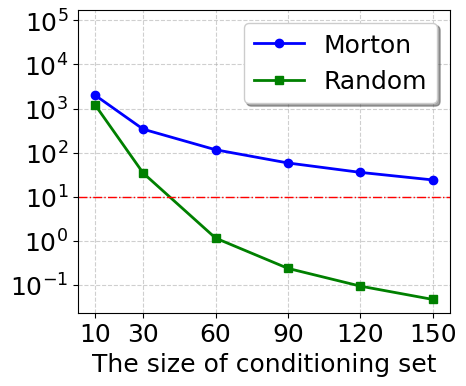

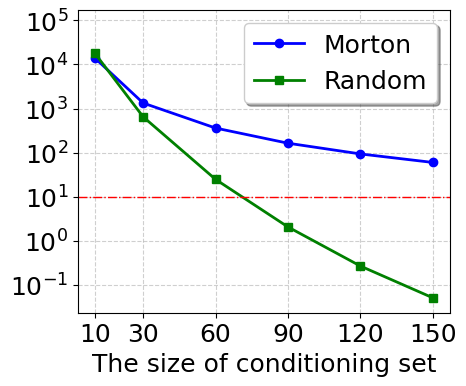

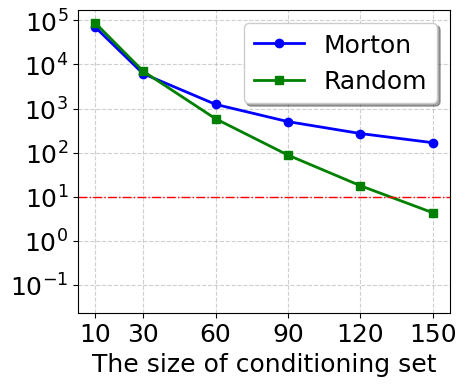

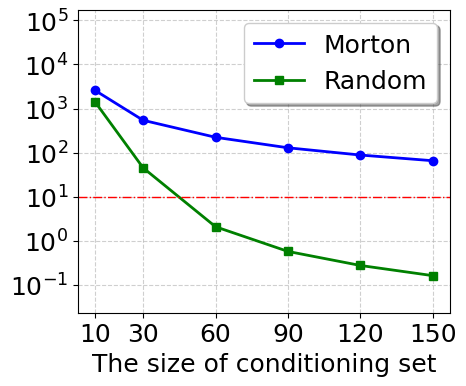

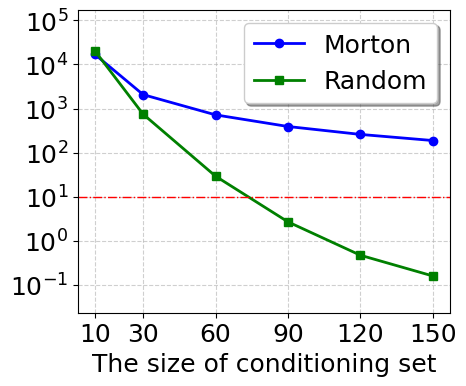

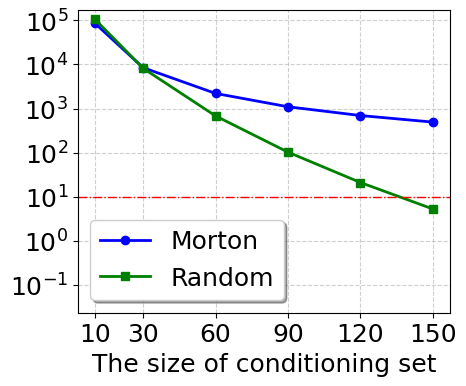

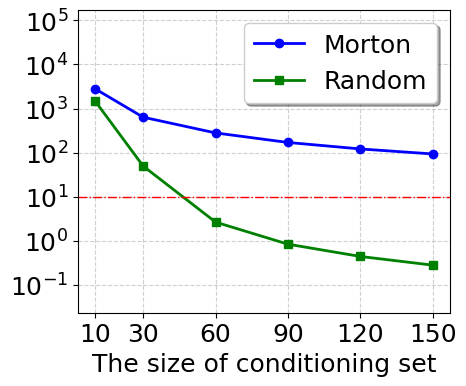

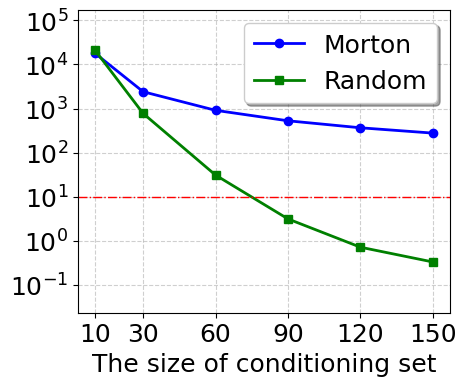

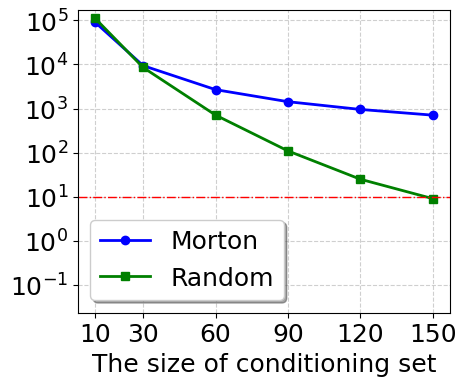

In [20]:
fig_dir = './fig'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

def plot_kl(x, y1, y2, info):
    fig, ax = plt.subplots(figsize=(5, 4.2))
    ax.plot(x, y1, label='Morton', color='blue', linewidth=2,  marker='o', markersize=6)
    ax.plot(x, y2, label='Random', color='green', linewidth=2,  marker='s', markersize=6)
    ax.set_xlabel('The size of conditioning set')
    # ax.set_ylabel('KL divergence')
    ax.legend(shadow=True, frameon=True) #fontsize=12,
    _list_xtick = cs_set
    
    # log scale
    ax.set_yscale('log')
    ax.set_yticks([1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5])  # List of y-tick positions
    plt.ylim(np.min([np.min(allh_morton), np.min(allh_random)])* 0.5,
             np.max([np.min(allh_morton), np.max(allh_random)]) * 1.5)
    plt.axhline(y = 10, color='red', linewidth=1.0, linestyle='-.')
    # normal scale
    # plt.ylim(np.min([np.min(allh_morton), np.min(allh_random)]),
    #          np.max([np.min(allh_morton), np.max(allh_random)])*0.1)
    plt.xticks(_list_xtick, _list_xtick)
    # plt.tick_params(axis='both', which='major') #, labelsize=12
    # plt.xlim(_list_xtick[0] - 1, _list_xtick[-1] + 1)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
    plt.tight_layout()
    plt.savefig(os.path.join(fig_folder, f'{info[1]}_{info[2]}.pdf'))
    # plt.show()

for i in range(num_exps_):
    plot_kl(cs_set, allh_morton[i, :], allh_random[i, :], params[i])